# 24-Hour Assignment: Questions 

---
**Assignment Guide**

* Answer **ALL** questions.
* Total marks: 40.
* Data for this assignment are available from the course L@G website. 
* Use Jupyter Notebook/Python to achieve the answers. 
* Justification is required if your (Python) coding is beyond what have been taught in the class – lack of clear justification will be marked off (even if the results are correct).
* Type up your answers in a Word file (you may copy & paste some of the Python outcomes to the file).
* Assignment submission: upload two files – [1] the Word file [2] the Jupyter Notebook/Python file (either pdf (preferred) or ipynb). 
* Note that the **Word file** should be **self-contained** (answers + supported Python outcomes + discussion/interpretation). 
* You must complete the **Academic Integrity Declaration for online exams** & **safe assignment check** before submission. 
* Late submission without approval is subject to penalty.
* Due: **1pm (Friday) 09 October, 2020**.

---

In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# stats librabries
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# machine learning libraries
# import sklearn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
# from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
# from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor 
# from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

# text analysis libraries 
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from sklearn.feature_extraction.text import CountVectorizer

# Question 1 (10 marks)

Use data from **H2019.csv** to answer this question. The dataset has the following variables

* Country: country name
* Hscore: happiness score (higher score implies higher degree of happiness)
* logGDP: log GDP per capita
* Freedom: freedom to make life choice (higher score implies higher degree of freedom)
* GQuality: Government Quality (higher score implies higher degree of government qaulity)


1. Classify countries with logGDP larger than 9.9 as 'Rich' countries &  all others as 'not-Rich' countries. How many countries are in the Rich group? Test if the mean of Hscore for Rich countries is the same as it is of not-Rich countries. Use the 6 steps of hypothesis testing to report the testing outcomes.
2. Find the 99% confidence interval (CI) of the mean of GQuality of Rich and Not-Rich countries, separately. Present the CI formula and interpret the results.
3. Report the OLS regression results of Hscore on logGDP, Freedom, and GQuality with statsmodels for all countries. Interpret the estimated slope coefficients (the partial effects) and the R-squared. 
4. Obtain the predicted Hscore based on the regression result of Part 3. Is the country with highest predicted Hscore the same as the one with highest acutal HScore? Which country's Hscore is most over-predicted? Which country's Hscore is most under-predicted?
5. Extend the regression model in Part 3 to assess if logGDP and GQuality show a synergy (complementary) effect to Hscore? Comment on the results.

In [2]:
H=pd.read_csv('H2019.csv')
H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   118 non-null    object 
 1   Hscore    118 non-null    float64
 2   logGDP    118 non-null    float64
 3   Freedom   118 non-null    float64
 4   GQuality  118 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


In [219]:
H.head(20)

,Country,Hscore,logGDP,Freedom,GQuality,Group,Number_p1
0,Afghanistan,2.375092,7.458469,0.393656,0.761509,not-Rich,3.223745
1,Albania,4.995318,9.456569,0.777351,0.857157,not-Rich,5.427285
2,Algeria,4.744627,9.537369,0.385083,2.593907,not-Rich,4.569061
3,Argentina,6.085561,9.772140,0.817053,1.695402,not-Rich,5.792387
4,Australia,7.233995,10.725492,0.917537,5.697913,Rich,6.974191
5,Austria,7.195361,10.756180,0.903428,5.429111,Rich,6.929813
6,Azerbaijan,5.173389,9.704785,0.854249,5.427393,not-Rich,6.187455
7,Bangladesh,5.114217,8.323947,0.901937,3.439954,not-Rich,5.338531
8,Belarus,5.821453,9.802853,0.656934,4.540952,not-Rich,5.631725
9,Belgium,6.772138,10.682823,0.776204,3.275025,Rich,6.350895


Part 1

In [193]:
#checking if the mean of Hscore for Rich countries is the same as it is of not-Rich countries
H['Group']=np.where(H['logGDP']>9.9,"Rich","not-Rich")
H.groupby('Group')['Hscore'].agg(['mean','count'])

,mean,count
Group,,
Rich,6.543017,40
not-Rich,5.002275,78


mean is different in both the cases 

In [194]:
# H0: losing proportion > 0.5 --> output: p-value (half -- one tailed)
stats.binom_test(78, 128, 0.50, alternative='greater')


0.008335367134848675

Null: proportion(not-Rich) > proportion(Rich) -- equivalently, proportion(not-Rich) >= 0.5; alternative: proportion(Rich) < 0.5

test stat: (p^-p0)/sqrt(p0*(1-p0)/n) where p^=0.6, p0=0.5, n=118 (test stat: 2.76)

p-value = 0.008335 (one-tailed), which is smaller than 0.05, so reject the null

Part 2

In [195]:
# Bootstrap CI
def Boot_CI(x,nr,alpha):
    n=len(x)
    mx=x.mean()
    means=(x.sample(n,replace=True).mean() for _ in range(nr))
    df=pd.DataFrame(means, columns=['mean'])
    df=df.sort_values('mean')
    C1 = df['mean'].quantile(alpha/2)
    C2 = df['mean'].quantile(1-(alpha/2))
    print((1-alpha)*100,"% CI")
    print('sample size:', n)
    print('Sample mean:', mx)
    print('[Boot-CI]','\nC1:', C1, '\nC2:', C2)
    print('[Pivot Boot-CI]','\nC1:', 2*mx-C2, '\nC2:', 2*mx-C1)

In [199]:
Boot_CI(H[H.Group=='Rich'].GQuality,1000,0.01)

99.0 % CI
sample size: 40
Sample mean: 3.7227071300148964
[Boot-CI] 
C1: 2.8124694515019653 
C2: 4.707551302537322
[Pivot Boot-CI] 
C1: 2.737862957492471 
C2: 4.632944808527828


In [200]:
Boot_CI(H[H.Group=='not-Rich'].GQuality,1000,0.01)

99.0 % CI
sample size: 78
Sample mean: 2.2228456766177445
[Boot-CI] 
C1: 1.9030153183600842 
C2: 2.5942821914186847
[Pivot Boot-CI] 
C1: 1.8514091618168043 
C2: 2.542676034875405


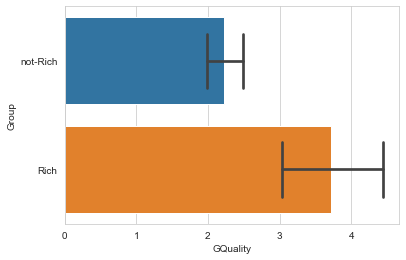

In [402]:
sns.barplot(x='GQuality',y='Group', capsize=0.5, data=H)

Clearly, both CI's are not symmetric (around mean) , both are longer in the upper-end. 

for both rich and not rich, we got the range that includes a part of the sampling distribution in form of C1 and C2


We have used the bootstrapping method here

Part 3

In [203]:
res1=smf.ols(formula='Hscore ~ logGDP + Freedom + GQuality', data=H).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Hscore   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     72.12
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           3.20e-26
Time:                        17:31:14   Log-Likelihood:                -119.78
No. Observations:                 118   AIC:                             247.6
Df Residuals:                     114   BIC:                             258.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2305      0.594     -3.755      0.0

Clearly, there is a clearly positive relation of Hscore with logGDP,Freedom and GQuality . However, the relationship between GQuality and Hscore is insignificant.

1 billion dolloar increase of logGDP is gives  0.5795  more billionaire.

1 billion dolloar increase of Freedom  is gives with  2.7029   more billionaire.

1 billion dolloar increase of GQuality is gives with   0.0894 more billionaire.
R-sq value is 0.655.

Part 4

In [229]:
#max h score
H[H['Hscore']==H['Hscore'].max()]

,Country,Hscore,logGDP,Freedom,GQuality,Group,Number_p1
33,Finland,7.780348,10.6517,0.947617,8.046616,Rich,7.222657


In [214]:
H['Number_p1'] = res1.predict()

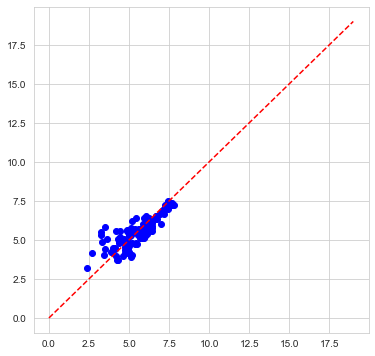

In [406]:
plt.figure(figsize=(6,6))
h = plt.plot(np.arange(0,20),np.arange(0,20), c='red', ls='--')
# scatter plot with plt
plt.scatter(H.Hscore,H.Number_p1,c='b')

In [230]:
H[H.Country=='Finland']

,Country,Hscore,logGDP,Freedom,GQuality,Group,Number_p1
33,Finland,7.780348,10.6517,0.947617,8.046616,Rich,7.222657


In [232]:
H[H['Number_p1']==H['Number_p1'].max()]

,Country,Hscore,logGDP,Freedom,GQuality,Group,Number_p1
61,Luxembourg,7.404016,11.46207,0.930321,6.104016,Rich,7.471886


The country with heighest predicted Hscore is Luxembourg which is 7.471886  

the country with highest actual Hscore is Finland which is 7.780348

The prediction is close to the actual value.

Country's Hscore being most over-predicted:-

In [234]:
H['diff']= H['Hscore']-H['Number_p1']

In [235]:
H[H['diff']==H['diff'].max()]

,Country,Hscore,logGDP,Freedom,GQuality,Group,Number_p1,diff
59,Liberia,5.121461,7.036142,0.705875,1.71531,not-Rich,3.908166,1.213295


So the most overpredicted country is Liberia.

Country's Hscore being most under-predicted:-

In [238]:
H[H['diff']==H['diff'].min()]

,Country,Hscore,logGDP,Freedom,GQuality,Group,Number_p1,diff
13,Botswana,3.471085,9.728861,0.832543,2.079205,not-Rich,5.84348,-2.372395


Botswana is the most underpredicted country.

In [ ]:
Part 5

Extend the regression model in Part 3 to assess if logGDP and GQuality show a synergy (complementary) effect to Hscore? Comment on the results.

In [ ]:
#Extending the model for synergy effect using logistic regression
results=smf.logit(formula='Hscore ~ logGDP + Freedom + GQuality', data=H).fit()
print(results.summary())

# Question 2

Load Covid19 data from the following link https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv and use the data to answer this question. Obtain data till the end of September (**2020-09-30**). (Alternatively, use **covid0930.csv**.) Note that the three numerical variables (Deaths, Confirms, and Recovered) in the dataset are **accumulated** figures (i.e. 'total' numbers up to date).

1. Find countries with total (accumulated) deaths over 15000 and obtain the first date for each of these countries when it happened. Find the dates that the total covid death number globally surpass 500000 and 1000000, respectively. 
2. Compute the global daily death rate (i.e. "Deaths" divided "Confirmed" across all countries in each day) and plot it in a line chart. Identify the period that the overall daily death rate is higher than 4%.
3. Find countries with at least one day having more than 20000 new confirmed cases. How many countries have never experienced over 100 daily new confirmed cases? 
4. Find 'increased deaths' globally during each of the following months: March, April, May, June, July, August, and September (i.e. **new** deaths in each month) and make a bar plot to present these 7 monthly death figures. Comment on the plot. 
5. Make 3 line plots (in one graph) of daily new confirmed cases in Australia: original, 7-day rolling (moving average), and 14-day rolling. Comment on the plot and identify the peak date of each series (line).

In [237]:
# get the Covid-19 data from the web (use data up to 2020-09-30)
# import data
url='https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
covid = pd.read_csv(url, parse_dates=['Date'])
covid = covid[covid.Date<='2020-09-30']
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47564 entries, 0 to 48872
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       47564 non-null  datetime64[ns]
 1   Country    47564 non-null  object        
 2   Confirmed  47564 non-null  int64         
 3   Recovered  47564 non-null  int64         
 4   Deaths     47564 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.2+ MB


In [22]:
covid.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


Part 1

In [23]:
covid[covid.Deaths>15000].Country.unique()

array(['Argentina', 'Brazil', 'Colombia', 'France', 'India', 'Iran',
       'Italy', 'Mexico', 'Peru', 'Russia', 'South Africa', 'Spain', 'US',
       'United Kingdom'], dtype=object)

In [24]:
c1=covid[covid.Confirmed>15000]
c1.groupby('Country').Date.min().sort_values()

Country
China             2020-02-02
Italy             2020-03-12
Iran              2020-03-17
Germany           2020-03-19
Spain             2020-03-19
                     ...    
North Macedonia   2020-09-06
Hungary           2020-09-17
Greece            2020-09-20
Croatia           2020-09-22
Tunisia           2020-09-27
Name: Date, Length: 87, dtype: datetime64[ns]

In [27]:
c_sum=covid.groupby('Date').sum()
c_sum.head()

,Confirmed,Recovered,Deaths
Date,,,
2020-01-22,555,28,17
2020-01-23,654,30,18
2020-01-24,941,36,26
2020-01-25,1434,39,42
2020-01-26,2118,52,56


In [33]:
c_sum[c_sum.Deaths>500000].head(1)

,Confirmed,Recovered,Deaths
Date,,,
2020-06-29,10273032,5235793,503435


In [35]:
c_sum[c_sum.Deaths>1000000].head(1)

,Confirmed,Recovered,Deaths
Date,,,
2020-09-28,33358976,23151081,1001660


Part 2

In [36]:
c_sum['d-rate']=c_sum.Deaths/c_sum.Confirmed*100
c_sum

,Confirmed,Recovered,Deaths,d-rate
Date,,,,
2020-01-22,555,28,17,3.063063
2020-01-23,654,30,18,2.752294
2020-01-24,941,36,26,2.763018
2020-01-25,1434,39,42,2.928870
2020-01-26,2118,52,56,2.644004
...,...,...,...,...
2020-09-26,32841726,22715380,994143,3.027073
2020-09-27,33081936,22925667,997742,3.015972
2020-09-28,33358976,23151081,1001660,3.002670


In [37]:
c_sum['four']=4

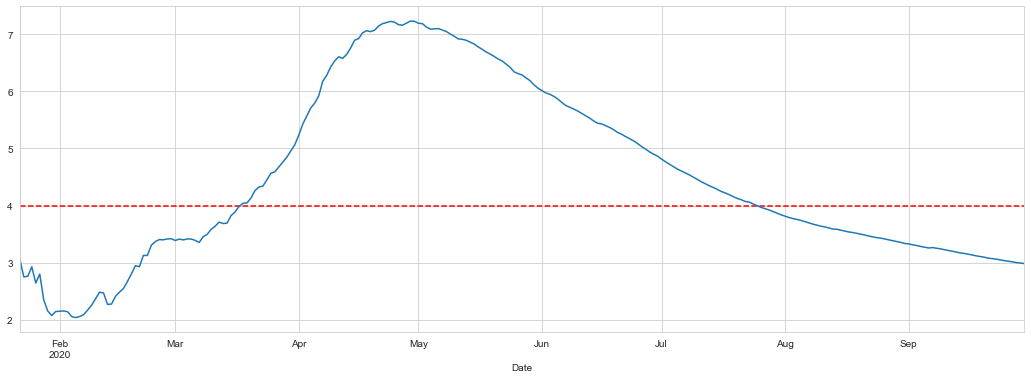

In [407]:
c_sum['four'].plot(kind='line', figsize=(18,6), style='--', color='red')
c_sum['d-rate'].plot(kind='line', figsize=(18,6))

In [40]:
c_sum[c_sum['d-rate']>4].head(1)

,Confirmed,Recovered,Deaths,d-rate,four
Date,,,,,
2020-03-18,219462,83321,8867,4.040335,4


In [41]:
c_sum[c_sum['d-rate']>4].tail(1)

,Confirmed,Recovered,Deaths,d-rate,four
Date,,,,,
2020-07-24,15786391,9043203,635852,4.027849,4


Between 2020-03-18 to 2020-07-24 death rate exceeded around 4%.

Part 3

In [43]:
covid_pivot = covid.pivot(index='Date', columns='Country', values='Confirmed')
covid_pivot.head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


In [44]:
covid_pivot_d=covid_pivot.diff()
covid_pivot_d.head(3)

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
covid_pivot_d.dropna(inplace=True)
covid_pivot_d.head(3)

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
(covid_pivot_d.iloc[:,:].max()>20000).value_counts()

False    182
True       6
dtype: int64

In [49]:
(covid_pivot_d.iloc[:,:].max()>20000).sort_values(ascending=False).head(14)

Country
US                   True
India                True
Spain                True
France               True
Brazil               True
Peru                 True
Dominica            False
Ethiopia            False
Germany             False
Georgia             False
Diamond Princess    False
Gambia              False
Gabon               False
Djibouti            False
dtype: bool

There are 6 countries with at least one day having more than 20000 new confirmed cases

In [50]:
(covid_pivot_d.iloc[:,:].max()<100).value_counts()

False    146
True      42
dtype: int64

In [52]:
(covid_pivot_d.iloc[:,:].max()>100).sort_values(ascending=False).head(14)

Country
Zimbabwe         True
Honduras         True
Guyana           True
Guinea-Bissau    True
Guinea           True
Guatemala        True
Greece           True
Ghana            True
Germany          True
Georgia          True
Gambia           True
Gabon            True
France           True
Finland          True
dtype: bool

There are 42 countries which has not experienced more than 100 cases a day

Part 4

In [90]:
covid.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [92]:
covid.set_index('Date',inplace=True)
covid.index=covid.index.month

In [93]:
covid.head()

,Country,Confirmed,Recovered,Deaths
Date,,,,
1,Afghanistan,0,0,0
1,Afghanistan,0,0,0
1,Afghanistan,0,0,0
1,Afghanistan,0,0,0
1,Afghanistan,0,0,0


In [110]:
#the top 7 values is from March to Septrmber, so we will plot them in bargraph
# by making a list and plotting using ,matplotib
month_death=[]
for i in range(3,10):
    monthly=covid[covid.index==i]['Deaths'].sum()
    month_death.append(monthly)
print(month_death)

[398323, 4347375, 9657801, 13294644, 18284141, 23801937, 28107135]


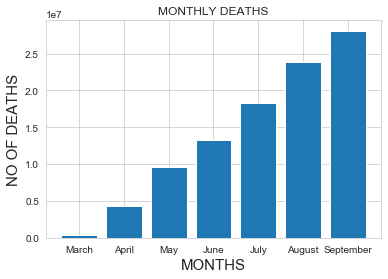

In [410]:
label = ['March',"April","May","June","July","August","September"]
plt.bar(label, month_death)
plt.xlabel('MONTHS', fontsize=15)
plt.ylabel('NO OF DEATHS', fontsize=15)
plt.title('MONTHLY DEATHS')
plt.show()

As per this graph, the no of deaths saw an exponential increase its value

Part 5

In [125]:
country=['Australia']
covid2 = covid[covid['Country'].isin(country)]
covid2.head(4)

,Date,Country,Confirmed,Recovered,Deaths
2080,2020-01-22,Australia,0,0,0
2081,2020-01-23,Australia,0,0,0
2082,2020-01-24,Australia,0,0,0
2083,2020-01-25,Australia,0,0,0


In [126]:
covid2p = covid2.pivot(index='Date', columns='Country', values='Confirmed')
covid2p.head(3)

Country,Australia
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0


In [127]:
covid2p1=covid2p.diff()
covid2p1.tail(5)

Country,Australia
Date,
2020-09-26,24.0
2020-09-27,4.0
2020-09-28,11.0
2020-09-29,23.0
2020-09-30,18.0


In [135]:
#7 days rolling
covid2p1['JP-ma7']=covid2p1['Australia'].rolling(7).mean()

In [132]:
#original
covid2p1['JP-org']=covid2p1['Australia']

In [133]:
#14 days rolling
covid2p1['JP-ma14']=covid2p1['Australia'].rolling(14).mean()

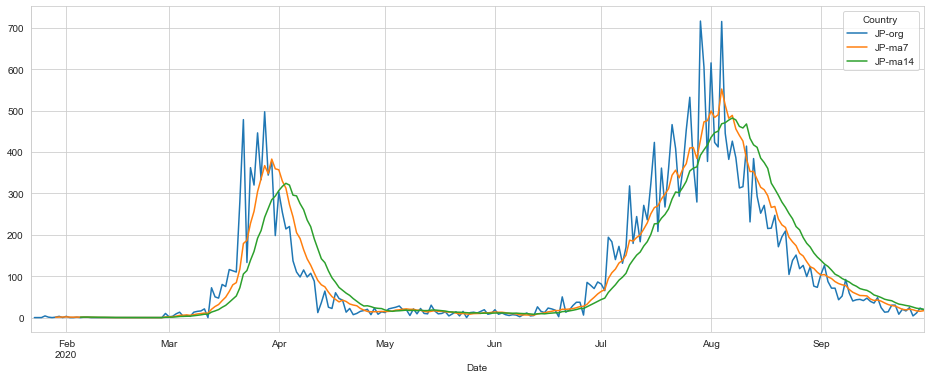

In [411]:
# plot US daily new cases, orginal & weekly moving average
covid2p1[['JP-org','JP-ma7','JP-ma14']].plot(kind='line',figsize=(16,6))

There seems to be two major waves of pandemic which arrived at the country and the second wave had more
impact than the previous one.

# Question 3

Use the dataset **yelp1000.xlsx** to answer this question. The dataset contains the following columns: date, stars, text (restaurant text reviews), cool, useful, and funny. 

1. Create a pie plot of the number of reviews (texts) for each type of star rating. Find the most frequent word used (excluding stopwords) for each type of star rating.
2. Obtain sentiment scores (compound, neg, neu and pos) of each review (text). Report the most positive text and the most negative one. How many texts are with neu score equal to 1?
3. Find the interquartile range of compound for each stars group (1 to 5) and make a boxplot of compound using different color for each stars group. Comment on the outcomes.
4. Find the total number of reviews in 2011 and 2012, respectively. Find the proportion of compound below zero in 2011 and 2012, respectively. Compute the 90% confidence interval of the proportion of compound below zero in 2011 and 2012, respectively. Comment on the results.
5. Use "apply(len)" to create a new column called "length" which is the number of words in the text column. Test if 60% (60 per cent) of the reviews (texts) are with more than 500 words (including space). State the null hypothesis and the alternative hypothesis. Comment on the results.

In [246]:
# load data
y=pd.read_csv('yelp1000.csv')
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   stars   1000 non-null   int64 
 2   text    1000 non-null   object
 3   cool    1000 non-null   int64 
 4   useful  1000 non-null   int64 
 5   funny   1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


Part 1

In [323]:
y.head(5)

,date,stars,text,cool,useful,funny,scores,compound,neg,neu,pos
0,2008-08-18,4,4 stars based on the sangria alone.\n\nOrder t...,4,2,2,"{'neg': 0.245, 'neu': 0.681, 'pos': 0.074, 'co...",-0.7420,0.245,0.681,0.074
1,2010-01-27,4,This place is a good go to when you're looking...,2,2,0,"{'neg': 0.061, 'neu': 0.664, 'pos': 0.275, 'co...",0.9858,0.061,0.664,0.275
2,2012-12-20,1,Still a place that is unacceptable in my book-...,0,0,4,"{'neg': 0.097, 'neu': 0.777, 'pos': 0.125, 'co...",0.3818,0.097,0.777,0.125
3,2012-03-27,4,A new breakfast option in old town Scottsdale....,2,4,1,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",0.8176,0.000,0.800,0.200
4,2006-08-08,4,The black beans are awesome. Also recommend th...,0,0,0,"{'neg': 0.055, 'neu': 0.573, 'pos': 0.372, 'co...",0.9300,0.055,0.573,0.372


In [306]:
from collections import Counter
Counter(" ".join(y["text"]).split()).most_common(10)

[('the', 5313),
 ('and', 4100),
 ('I', 3594),
 ('a', 3291),
 ('to', 2974),
 ('of', 1965),
 ('was', 1907),
 ('is', 1605),
 ('for', 1387),
 ('in', 1342)]

In [399]:
#for 1 star
y[y['stars']==1]
Counter(" ".join(y[y['stars']==1]["text"]).split()).most_common(5)

[('the', 470), ('I', 380), ('and', 329), ('to', 317), ('a', 233)]

In [319]:
#for 2 star
y[y['stars']==2]
Counter(" ".join(y[y['stars']==2]["text"]).split()).most_common(5)

[('the', 651), ('I', 440), ('and', 428), ('to', 384), ('a', 317)]

In [320]:
#for 3 star
y[y['stars']==3]
Counter(" ".join(y[y['stars']==3]["text"]).split()).most_common(5)

[('the', 905), ('and', 629), ('I', 608), ('a', 598), ('to', 498)]

In [321]:
#for 4 star
y[y['stars']==4]
Counter(" ".join(y[y['stars']==4]["text"]).split()).most_common(5)

[('the', 1734), ('and', 1385), ('a', 1113), ('I', 1069), ('to', 899)]

In [322]:
#for 5 star
y[y['stars']==5]
Counter(" ".join(y[y['stars']==5]["text"]).split()).most_common(5)

[('the', 1553), ('and', 1329), ('I', 1097), ('a', 1030), ('to', 876)]

This is all the most used words in every star rating.

'The' is the most common word used overall

In [254]:
y1=y[['text','stars']]
y1.head()

,text,stars
0,4 stars based on the sangria alone.\n\nOrder t...,4
1,This place is a good go to when you're looking...,4
2,Still a place that is unacceptable in my book-...,1
3,A new breakfast option in old town Scottsdale....,4
4,The black beans are awesome. Also recommend th...,4


In [413]:
pi=y1['stars'].value_counts()
pi

5    361
4    307
3    161
2     92
1     79
Name: stars, dtype: int64

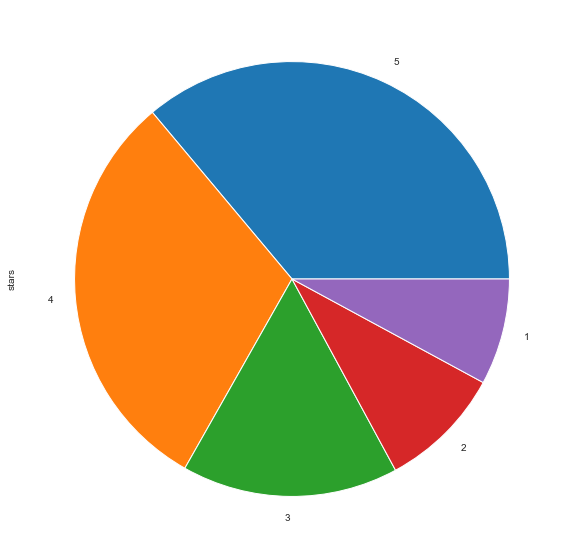

In [414]:
pi.plot(kind='pie', figsize=(10,10))

Part 2

In [273]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\NISHANT
[nltk_data]     ARNAV\AppData\Roaming\nltk_data...


In [285]:
y['scores'] = y['text'].apply(lambda text: sid.polarity_scores(text))

y.head()

,date,stars,text,cool,useful,funny,scores
0,2008-08-18,4,4 stars based on the sangria alone.\n\nOrder t...,4,2,2,"{'neg': 0.245, 'neu': 0.681, 'pos': 0.074, 'co..."
1,2010-01-27,4,This place is a good go to when you're looking...,2,2,0,"{'neg': 0.061, 'neu': 0.664, 'pos': 0.275, 'co..."
2,2012-12-20,1,Still a place that is unacceptable in my book-...,0,0,4,"{'neg': 0.097, 'neu': 0.777, 'pos': 0.125, 'co..."
3,2012-03-27,4,A new breakfast option in old town Scottsdale....,2,4,1,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound..."
4,2006-08-08,4,The black beans are awesome. Also recommend th...,0,0,0,"{'neg': 0.055, 'neu': 0.573, 'pos': 0.372, 'co..."


In [290]:
y['compound'] = [sid.polarity_scores(x)['compound'] for x in y['text']]
y['neg'] = [sid.polarity_scores(x)['neg'] for x in y['text']]
y['neu'] = [sid.polarity_scores(x)['neu'] for x in y['text']]
y['pos'] = [sid.polarity_scores(x)['pos'] for x in y['text']]

In [291]:
y.head()

,date,stars,text,cool,useful,funny,scores,compound,neg,neu,pos
0,2008-08-18,4,4 stars based on the sangria alone.\n\nOrder t...,4,2,2,"{'neg': 0.245, 'neu': 0.681, 'pos': 0.074, 'co...",-0.7420,0.245,0.681,0.074
1,2010-01-27,4,This place is a good go to when you're looking...,2,2,0,"{'neg': 0.061, 'neu': 0.664, 'pos': 0.275, 'co...",0.9858,0.061,0.664,0.275
2,2012-12-20,1,Still a place that is unacceptable in my book-...,0,0,4,"{'neg': 0.097, 'neu': 0.777, 'pos': 0.125, 'co...",0.3818,0.097,0.777,0.125
3,2012-03-27,4,A new breakfast option in old town Scottsdale....,2,4,1,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",0.8176,0.000,0.800,0.200
4,2006-08-08,4,The black beans are awesome. Also recommend th...,0,0,0,"{'neg': 0.055, 'neu': 0.573, 'pos': 0.372, 'co...",0.9300,0.055,0.573,0.372


In [293]:
y[y['pos'] == y['pos'].max()]

,date,stars,text,cool,useful,funny,scores,compound,neg,neu,pos
534,2012-06-11,5,Fresh and delicious.,0,2,0,"{'neg': 0.0, 'neu': 0.143, 'pos': 0.857, 'comp...",0.7184,0.0,0.143,0.857


"Fresh and delicious." is the most positive text.

In [294]:
y[y['neg'] == y['neg'].max()]

,date,stars,text,cool,useful,funny,scores,compound,neg,neu,pos
76,2012-09-08,1,Very bad food!,0,1,0,"{'neg': 0.671, 'neu': 0.329, 'pos': 0.0, 'comp...",-0.623,0.671,0.329,0.0


 "Very bad food!" is the most negative text.

In [401]:
ne=y[y['neu'] == 1]
ne.head()

,date,stars,text,cool,useful,funny,scores,compound,neg,neu,pos,year,length
17,2012-04-18,5,"The ""Cheers"" of central Phoenix.",0,1,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,2012,5
29,2012-01-19,2,Not long ago I went and got takeout - and ever...,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,2012,15
53,2012-02-09,4,Grocery store was within walking distance for ...,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,2012,18
312,2012-06-14,1,Not a company to do business with ... From my ...,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,2012,12
387,2010-07-13,5,While Calabria Italian Kitchen & Deli is at th...,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,2010,16


In [303]:
ne['neu'].sum()

12.0

Total, there are 12 neutral reviews.

Part 3

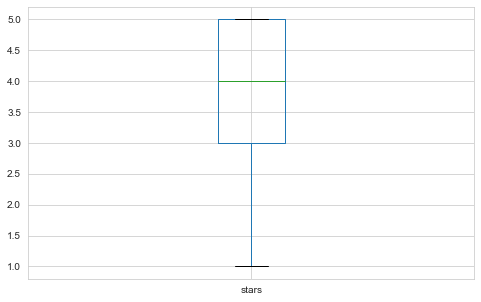

In [415]:
#box plot to understand the quartile ranges
y1.plot(kind='box', figsize=(8,5))

Part 4

 Total number of reviews in 2011 and 2012,

In [332]:
y.head()

,date,stars,text,cool,useful,funny,scores,compound,neg,neu,pos
0,2008-08-18,4,4 stars based on the sangria alone.\n\nOrder t...,4,2,2,"{'neg': 0.245, 'neu': 0.681, 'pos': 0.074, 'co...",-0.7420,0.245,0.681,0.074
1,2010-01-27,4,This place is a good go to when you're looking...,2,2,0,"{'neg': 0.061, 'neu': 0.664, 'pos': 0.275, 'co...",0.9858,0.061,0.664,0.275
2,2012-12-20,1,Still a place that is unacceptable in my book-...,0,0,4,"{'neg': 0.097, 'neu': 0.777, 'pos': 0.125, 'co...",0.3818,0.097,0.777,0.125
3,2012-03-27,4,A new breakfast option in old town Scottsdale....,2,4,1,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",0.8176,0.000,0.800,0.200
4,2006-08-08,4,The black beans are awesome. Also recommend th...,0,0,0,"{'neg': 0.055, 'neu': 0.573, 'pos': 0.372, 'co...",0.9300,0.055,0.573,0.372


In [338]:
y['year'] = pd.DatetimeIndex(y['date']).year
y.head()

,date,stars,text,cool,useful,funny,scores,compound,neg,neu,pos,year
0,2008-08-18,4,4 stars based on the sangria alone.\n\nOrder t...,4,2,2,"{'neg': 0.245, 'neu': 0.681, 'pos': 0.074, 'co...",-0.7420,0.245,0.681,0.074,2008
1,2010-01-27,4,This place is a good go to when you're looking...,2,2,0,"{'neg': 0.061, 'neu': 0.664, 'pos': 0.275, 'co...",0.9858,0.061,0.664,0.275,2010
2,2012-12-20,1,Still a place that is unacceptable in my book-...,0,0,4,"{'neg': 0.097, 'neu': 0.777, 'pos': 0.125, 'co...",0.3818,0.097,0.777,0.125,2012
3,2012-03-27,4,A new breakfast option in old town Scottsdale....,2,4,1,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",0.8176,0.000,0.800,0.200,2012
4,2006-08-08,4,The black beans are awesome. Also recommend th...,0,0,0,"{'neg': 0.055, 'neu': 0.573, 'pos': 0.372, 'co...",0.9300,0.055,0.573,0.372,2006


In [361]:
y2011=y[y['year']==2011]
y2011

,date,stars,text,cool,useful,funny,scores,compound,neg,neu,pos,year
6,2011-04-19,4,Recently ate at Macaroni Grill at Desert Ridge...,0,1,0,"{'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'comp...",0.9762,0.000,0.722,0.278,2011
10,2011-01-16,2,I used to frequent this place when it was Long...,0,5,2,"{'neg': 0.113, 'neu': 0.819, 'pos': 0.068, 'co...",-0.9439,0.113,0.819,0.068,2011
15,2011-07-02,4,I recently went to my first First Friday (and ...,0,1,0,"{'neg': 0.02, 'neu': 0.828, 'pos': 0.152, 'com...",0.9894,0.020,0.828,0.152,2011
16,2011-07-30,2,"I don't get it!!\nMy husband, daughter and I w...",0,1,0,"{'neg': 0.097, 'neu': 0.84, 'pos': 0.063, 'com...",-0.9887,0.097,0.840,0.063,2011
26,2011-10-09,3,Brunch Review:\n\nDYNaMITE BLOODYMARYS. Someth...,0,1,1,"{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp...",0.9697,0.000,0.815,0.185,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
985,2011-02-07,3,I remember a time when Ikea was an almost lege...,1,2,1,"{'neg': 0.019, 'neu': 0.828, 'pos': 0.153, 'co...",0.9797,0.019,0.828,0.153,2011
989,2011-11-04,5,My home airport and one of the nicest terminal...,1,1,0,"{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...",0.9000,0.000,0.647,0.353,2011
991,2011-10-23,5,The greatest community that I've ever been a p...,0,0,0,"{'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'comp...",0.9884,0.000,0.715,0.285,2011
996,2011-05-20,5,"I am a big fan of this place, either to stop i...",0,1,0,"{'neg': 0.022, 'neu': 0.699, 'pos': 0.278, 'co...",0.9757,0.022,0.699,0.278,2011


In [369]:
a=len(y2011[y2011['compound']<0])

In [364]:
y2012=y[y['year']==2012]
y2012

,date,stars,text,cool,useful,funny,scores,compound,neg,neu,pos,year
2,2012-12-20,1,Still a place that is unacceptable in my book-...,0,0,4,"{'neg': 0.097, 'neu': 0.777, 'pos': 0.125, 'co...",0.3818,0.097,0.777,0.125,2012
3,2012-03-27,4,A new breakfast option in old town Scottsdale....,2,4,1,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",0.8176,0.000,0.800,0.200,2012
13,2012-12-13,5,Just want to Say ThankYou Hawaiian Airlines fo...,0,0,0,"{'neg': 0.101, 'neu': 0.711, 'pos': 0.188, 'co...",0.2702,0.101,0.711,0.188,2012
14,2012-05-26,2,A very inadequate meal and expensive for the l...,1,3,0,"{'neg': 0.244, 'neu': 0.675, 'pos': 0.082, 'co...",-0.8901,0.244,0.675,0.082,2012
17,2012-04-18,5,"The ""Cheers"" of central Phoenix.",0,1,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,1.000,0.000,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
973,2012-01-08,5,Great little place in a great little neighborh...,0,0,0,"{'neg': 0.0, 'neu': 0.533, 'pos': 0.467, 'comp...",0.9819,0.000,0.533,0.467,2012
981,2012-08-24,5,I have had a couple of peels at A-Peeling Face...,0,0,0,"{'neg': 0.067, 'neu': 0.773, 'pos': 0.16, 'com...",0.6558,0.067,0.773,0.160,2012
987,2012-08-19,1,I hadn't been to Fuddruckers for about 20 year...,1,1,1,"{'neg': 0.022, 'neu': 0.858, 'pos': 0.12, 'com...",0.8685,0.022,0.858,0.120,2012
992,2012-01-12,5,I have completed this run (obviously not the 2...,1,1,1,"{'neg': 0.0, 'neu': 0.77, 'pos': 0.23, 'compou...",0.9829,0.000,0.770,0.230,2012


So there are 271 reviews in 2011 and 293 reviews in 2012

In [372]:
b=len(y2012[y2012['compound']<0])
proportion= a/b
print(proportion)

0.48936170212765956


In [ ]:
The proportion of compound below zero in 2011 and 2012 is 0.48936170212765956

Part 5

In [380]:
y['length'] = y['text'].str.split().str.len()

In [381]:
y.head()

,date,stars,text,cool,useful,funny,scores,compound,neg,neu,pos,year,length
0,2008-08-18,4,4 stars based on the sangria alone.\n\nOrder t...,4,2,2,"{'neg': 0.245, 'neu': 0.681, 'pos': 0.074, 'co...",-0.7420,0.245,0.681,0.074,2008,36
1,2010-01-27,4,This place is a good go to when you're looking...,2,2,0,"{'neg': 0.061, 'neu': 0.664, 'pos': 0.275, 'co...",0.9858,0.061,0.664,0.275,2010,137
2,2012-12-20,1,Still a place that is unacceptable in my book-...,0,0,4,"{'neg': 0.097, 'neu': 0.777, 'pos': 0.125, 'co...",0.3818,0.097,0.777,0.125,2012,52
3,2012-03-27,4,A new breakfast option in old town Scottsdale....,2,4,1,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",0.8176,0.000,0.800,0.200,2012,34
4,2006-08-08,4,The black beans are awesome. Also recommend th...,0,0,0,"{'neg': 0.055, 'neu': 0.573, 'pos': 0.372, 'co...",0.9300,0.055,0.573,0.372,2006,31


In [393]:
len(y[y['length']>500])


10

In [394]:
y.shape

(1000, 13)

 Percentage of text with  more than 500 words is 0.01 per.

Null hypothesis: 60 per of the reviews (texts) are with more than 500 words
Alternative hypothesis: 60 per of the reviews are not more than 500 words

In [396]:
stats.binom_test(990, 1000, 0.6, alternative='greater')

6.570264377021384e-201

the hypothesis is false as it is far less than 0.05

# Question 4

Use **loans1000.csv** for this question. There are 6 variables in the dataset (see below) -- it is of interest to use [1]-[5] to predict [6]. Set random_state=1234 throughout (when required).

* [1] credit.policy: 1 if the customer meets the credit underwriting criteria, and 0 otherwise.
* [2] log.annual.inc: The natural log of the self-reported annual income of the borrower.
* [3] dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* [4] fico: The FICO credit score of the borrower.
* [5] delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* [6] not.fully.paid: 1 if not fully paid the loan, and 0 otherwise.


1. How many borrowers do not pay the loan fully? Are the mean values of FICO credit score significantly different between fully-paid borrowers and not.fully.paid borrowers? Justify.
2. Apply KMeans clustering using [1]-[5] (i.e. credit.policy, log.annual.inc, dti, fico, and delinq.2yrs). Find the optimal number clusters (set the maximum number of clusters as 10) without scaling. Justify your answer.
3. Form 2 clusters (with KMeans) and use the crosstab to examine if the clustering outcome is in line with borrower's "not.fully.paid" status. Comment on the results.
4. Create a random partition of the loans1000.csv dataset with 70% of observations in the training set and the remaining 30% in the test set. Report the sample mean and standard deviation for each of the variables in both train and test sets, separately. Comment on the results.
5. Based on the data split of Part 4, apply Decision Tree, Random Forest, and Gradient Boosting (with n_estimators=1000) to the Train set and use the obtained models to predict the Test set. Use accuracy, precision, and recall to evaluate the performance of these models. Comment on the results.

In [138]:
# load loans1000
L=pd.read_csv('loans1000.csv')
L.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   credit.policy   1000 non-null   int64  
 1   log.annual.inc  1000 non-null   float64
 2   dti             1000 non-null   float64
 3   fico            1000 non-null   int64  
 4   delinq.2yrs     1000 non-null   int64  
 5   not.fully.paid  1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [139]:
L.head()

,credit.policy,log.annual.inc,dti,fico,delinq.2yrs,not.fully.paid
0,1,10.682812,13.13,687,1,1
1,1,11.736101,9.34,677,1,0
2,1,11.002100,3.48,702,0,0
3,1,10.126631,18.48,702,2,1
4,1,11.512925,8.95,677,0,0


Part 1

In [143]:
L['not.fully.paid'].value_counts()

0    848
1    152
Name: not.fully.paid, dtype: int64

So 152 of the borrowers have not fully paid the loan

In [147]:
L[L['not.fully.paid']==1]['fico'].mean()

696.2105263157895

In [148]:
L[L['not.fully.paid']==0]['fico'].mean()

714.4823113207547

There is not much significant change between the FICO score between fully and no fully paid borrowers.
The difference is 18.2715. But those who have supposedly more FICO score than the other as they get rating based on that only.

Part 2

In [149]:
#define a function called Elbow_Curve
def Elbow_Curve(X, kmax):
    # inertia_: Sum of Squared Distances
    inertia = []
    s = []
    # no. of clusters (max 10)
    for k in range(1, kmax+1):
        KM = KMeans(n_clusters=k).fit(X)
        inertia.append(KM.inertia_) 
    fig = plt.figure(figsize=(6, 4))
    plt.plot(range(1, kmax+1), inertia, 'bo-')
    plt.title('Elbow curve')

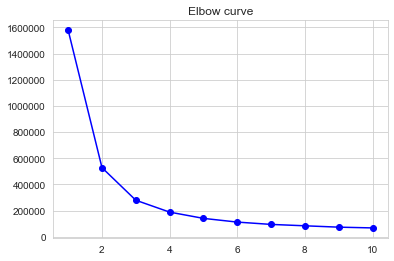

In [156]:
#without scaling
Elbow_Curve(L.iloc[:, 1:6], 10)
#we are taking the first three parameters for analysis which are credit.policy, log.annual.inc, dti, fico, and delinq.2yrs

The most optimal number of cluster in this case is 4 as , the line becomes linear after that.


Part 3


For just 2 clusters we are using the crosstab to examine if the clustering outcome is in line with borrower's "not.fully.paid" status.

In [161]:
KM=KMeans(n_clusters=2, random_state=101).fit(L.iloc[:, 1:6])
# add cluster label
L["C"] = KM.labels_

In [162]:
print(pd.crosstab(L['C'], L['not.fully.paid']))

not.fully.paid    0    1
C                       
0               504  111
1               344   41


From the Elbow curve, kink at k=4 is the optmal choice (second best could be 3).

Both C= 0 and 1 are dominated by borrowers who have paid their loans completely.

In general, the grouping outcomes do match well with the payment status.

In [163]:
L.columns

Index(['credit.policy', 'log.annual.inc', 'dti', 'fico', 'delinq.2yrs',
       'not.fully.paid', 'C'],
      dtype='object')

Part 4

In [165]:
#Train test Split
y= L['not.fully.paid']
X= L[[ 'credit.policy', 'log.annual.inc', 'dti', 'fico', 'delinq.2yrs']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

test size =0.3 means, 70 per of data in train and 30 percent in test.
the random partition of the loans1000.csv dataset with 70% of observations in the training set and the remaining 30% in the test set. 

In [416]:
X_train[['credit.policy', 'log.annual.inc', 'dti', 'fico', 'delinq.2yrs']].agg(['mean','std'])

,credit.policy,log.annual.inc,dti,fico,delinq.2yrs
mean,0.792857,10.91899,12.532971,710.942857,0.150000
std,0.405549,0.58569,6.953387,38.907978,0.520331


In [168]:
 X_test[['credit.policy', 'log.annual.inc', 'dti', 'fico', 'delinq.2yrs']].agg(['mean','std'])

,credit.policy,log.annual.inc,dti,fico,delinq.2yrs
mean,0.806667,10.947912,12.039533,713.483333,0.170000
std,0.395572,0.593724,7.124214,39.595147,0.463843


There is not much difference between the mean or standard deviation in these two set as it is split completely randomly.

This is the mean and standard deviation of both test and train set.

Part 5

# Decision Tree

As the Decision Tree CLassifier is already imported, we can  use it directly.

In [179]:

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [420]:
pred = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       250
           1       0.26      0.24      0.25        50

    accuracy                           0.76       300
   macro avg       0.56      0.55      0.55       300
weighted avg       0.75      0.76      0.76       300

[[216  34]
 [ 38  12]]
0.76


# Random Forest

As the Random Forest CLassifier is already imported, we can  use it directly.

In [182]:
#As the Random Forest CLassifier is already imported, we can  use it directly.
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [419]:
rfc_p = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_p))
print(classification_report(y_test,rfc_p))
print(accuracy_score(y_test,rfc_p))

[[250   0]
 [ 45   5]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       250
           1       1.00      0.10      0.18        50

    accuracy                           0.85       300
   macro avg       0.92      0.55      0.55       300
weighted avg       0.87      0.85      0.79       300

0.85


# GRADIENT BOOSTING

As the Gradient Boosting CLassifier is already imported,we can  use it directly.

In [190]:
grad = GradientBoostingClassifier(random_state=0,n_estimators=1000)
grad.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [417]:
grad_p = grad.predict(X_test)
print(confusion_matrix(y_test,grad_p))
print(classification_report(y_test,grad_p))
print(accuracy_score(y_test,grad_p))

[[236  14]
 [ 42   8]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       250
           1       0.36      0.16      0.22        50

    accuracy                           0.81       300
   macro avg       0.61      0.55      0.56       300
weighted avg       0.77      0.81      0.78       300

0.8133333333333334


In between these three algorithms, the Random Forest works best for this case followed by 
The bagging method or the Random forest is most efficient with accuracy of 85 per when compared to the bossting algorithm of Gradient Boosting.
Various other parameters are also shown here which make the analysis easier like confusion matrix and the classification report.

# End of Assignment